# Pre-Processing Techniques

## Imports

In [38]:
# CONSTANT Variables
files = ['Data/Plasma/ADNI_BLENNOWPLASMANFLLONG_10_03_18_12Feb2024.csv', 'Data/Plasma/UGOTPTAU181_06_18_20_27Nov2023.csv', 'Data/Plasma/UPENNMSMSABETA2_12Feb2024.csv']

fields_needed = ['RID', 'VISCODE2', 'PLASMA_NFL', 'PLASMAPTAU181', 'ABETA42', 'ABETA40'] # Fields needed after the merge
# This is the AB value names that can be used
abvals = ['ABETA42', 'ABETA40']

display1 = ['PLASMA_NFL', 'PLASMAPTAU181', 'AB4240'] # These should be the biomarker values
display2 = ['MMSE', 'PTEDUCAT', 'AGE'] # This should be the Non-Blood values, such as MMSE etc.

output_file_path = "File2/"

In [39]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp

## Read the Relevant Dataframes and Merge

In [40]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE2'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(abvals)
preprocessor.df


,RID,VISCODE2,PLASMA_NFL,PLASMAPTAU181,AB4240
0,31,m60,50.7,18.642,0.101372
1,31,m60,50.7,21.306,0.101372
2,31,m60,56.2,18.642,0.101372
3,31,m60,56.2,21.306,0.101372
4,31,m96,64.0,24.496,0.073391
...,...,...,...,...,...
1176,5289,bl,21.5,8.672,0.195596
1177,5290,bl,42.4,18.583,0.076744
1178,5292,bl,42.6,17.408,0.102321
1179,5295,bl,16.4,10.932,0.144890


In [41]:
preprocessor.df.rename(columns={"VISCODE2":"VISCODE"}, inplace=True) # Data in the class is based on VISCODE
preprocessor.add_adni_merge_data(['RID', 'DX', 'VISCODE', 'PLASMA_NFL', 'PLASMAPTAU181', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE'])
preprocessor.df

/Users/danielmakin/Documents/Alzhiemers/NoMoreAlzheimersDisease/PreProcessingPy.py:56: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.merge(self.df, am, on=['RID', 'VISCODE'], how='inner')[fields_to_keep]


,RID,DX,VISCODE,PLASMA_NFL,PLASMAPTAU181,AB4240,MMSE,PTEDUCAT,AGE
0,31,CN,m60,50.7,18.642,0.101372,30.0,18,77.7
1,31,CN,m60,50.7,21.306,0.101372,30.0,18,77.7
2,31,CN,m60,56.2,18.642,0.101372,30.0,18,77.7
3,31,CN,m60,56.2,21.306,0.101372,30.0,18,77.7
4,31,CN,m96,64.0,24.496,0.073391,30.0,18,77.7
...,...,...,...,...,...,...,...,...,...
1176,5289,CN,bl,21.5,8.672,0.195596,29.0,16,59.7
1177,5290,CN,bl,42.4,18.583,0.076744,29.0,12,67.0
1178,5292,CN,bl,42.6,17.408,0.102321,30.0,13,74.3
1179,5295,CN,bl,16.4,10.932,0.144890,29.0,15,75.5


## Rename Fields

In [42]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,DX,VISCODE,PLASMA_NFL,PLASMAPTAU181,AB4240,MMSE,PTEDUCAT,AGE
0,31,SCD,m60,50.7,18.642,0.101372,30.0,18,77.7
1,31,SCD,m60,50.7,21.306,0.101372,30.0,18,77.7
2,31,SCD,m60,56.2,18.642,0.101372,30.0,18,77.7
3,31,SCD,m60,56.2,21.306,0.101372,30.0,18,77.7
4,31,SCD,m96,64.0,24.496,0.073391,30.0,18,77.7
...,...,...,...,...,...,...,...,...,...
1176,5289,SCD,bl,21.5,8.672,0.195596,29.0,16,59.7
1177,5290,SCD,bl,42.4,18.583,0.076744,29.0,12,67.0
1178,5292,SCD,bl,42.6,17.408,0.102321,30.0,13,74.3
1179,5295,SCD,bl,16.4,10.932,0.144890,29.0,15,75.5


## Plot the data

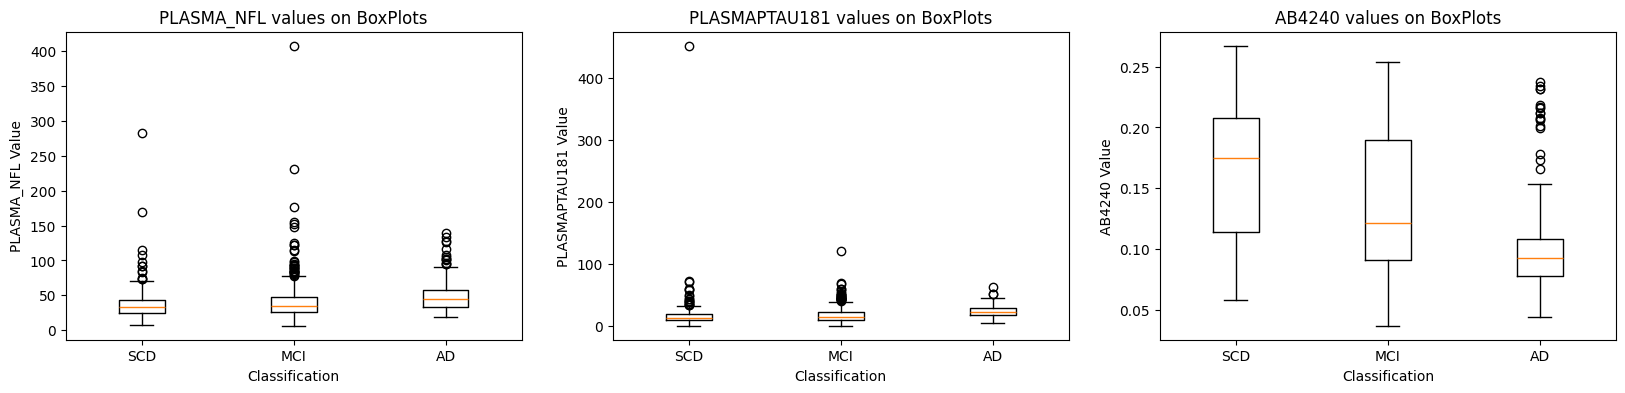

In [43]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)

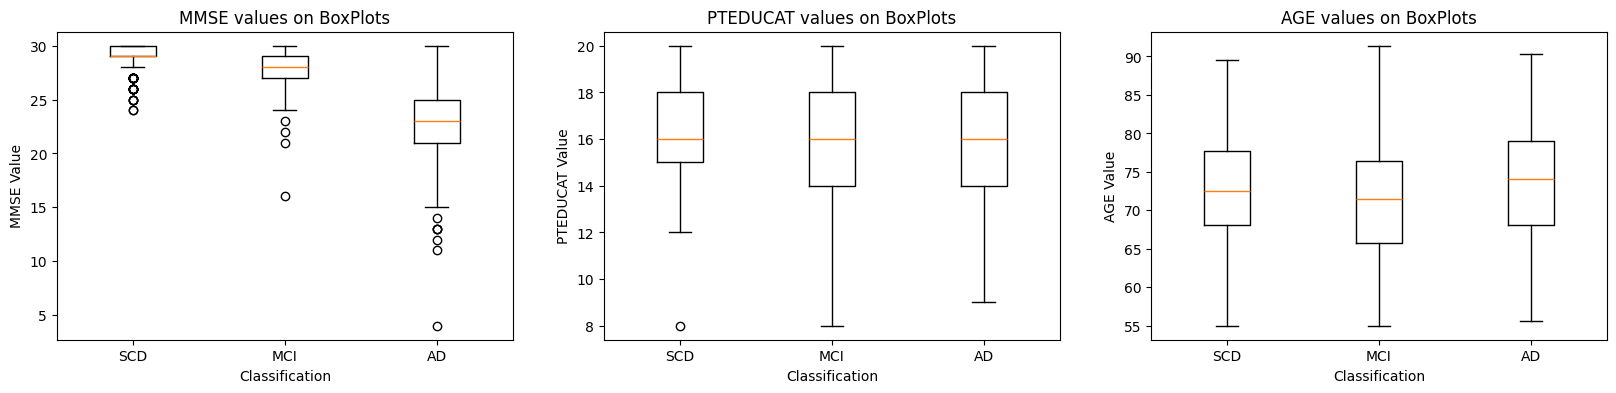

In [44]:
vd.display(display2)

In [45]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [46]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)

[397, 669, 417, 674, 418, 562, 818, 819, 438, 695, 696, 697, 698, 60, 61, 329, 73, 589, 350, 612, 100, 102, 999, 622, 1135, 1149]


### Display the Filtered Data

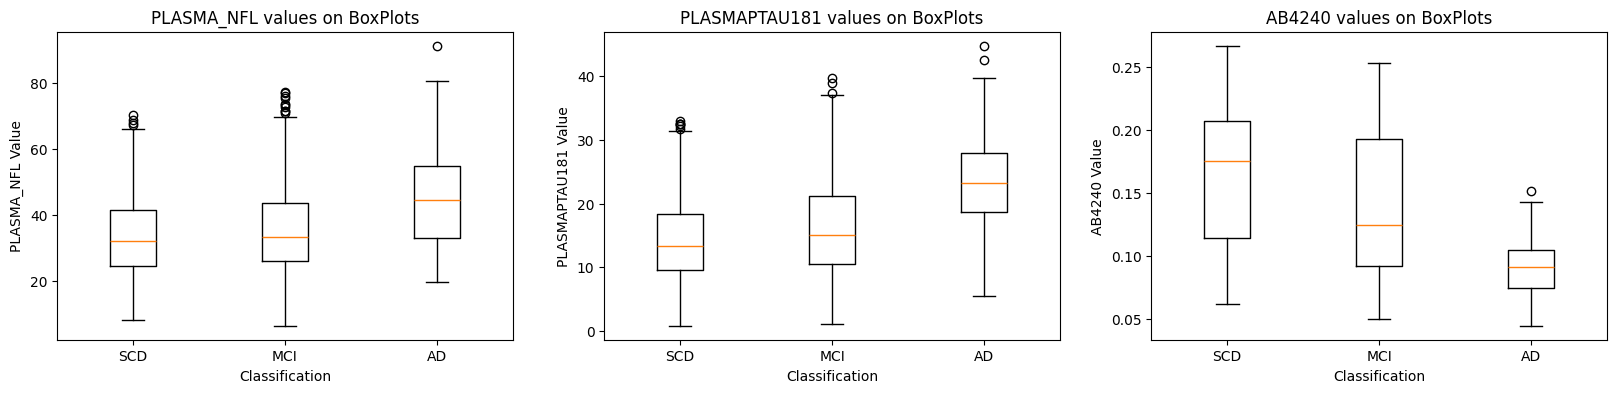

In [47]:
vd = visual_display(preprocessor.df)
vd.display(display1)

In [48]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## SMOTE Oversampling

In [49]:
preprocessor.use_SMOTE() # Needs to remove the RID, VISCODE Values (Shouldn't be needed)
preprocessor.df

,PLASMA_NFL,PLASMAPTAU181,AB4240,MMSE,PTEDUCAT,AGE,DX
0,50.7,18.642,0.101372,30.0,18.0,77.7,SCD
1,50.7,21.306,0.101372,30.0,18.0,77.7,SCD
2,56.2,18.642,0.101372,30.0,18.0,77.7,SCD
3,56.2,21.306,0.101372,30.0,18.0,77.7,SCD
4,64.0,24.496,0.073391,30.0,18.0,77.7,SCD
...,...,...,...,...,...,...,...
1630,20.121446,8.432165,0.194989,29.255957,18.0,73.183936,SCD
1631,24.825774,6.712473,0.169814,30.0,16.752582,67.599312,SCD
1632,41.9894,24.204406,0.108281,29.184334,19.815666,73.131333,SCD
1633,27.794865,13.541365,0.184818,29.080873,20.0,73.5,SCD


## Analysis of the SMOTE Data

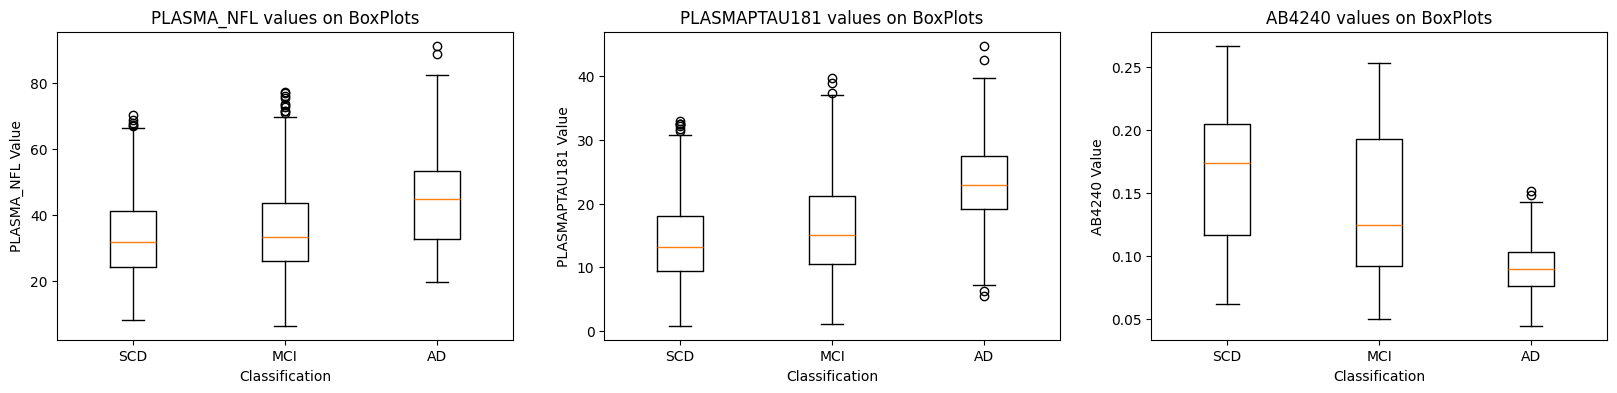

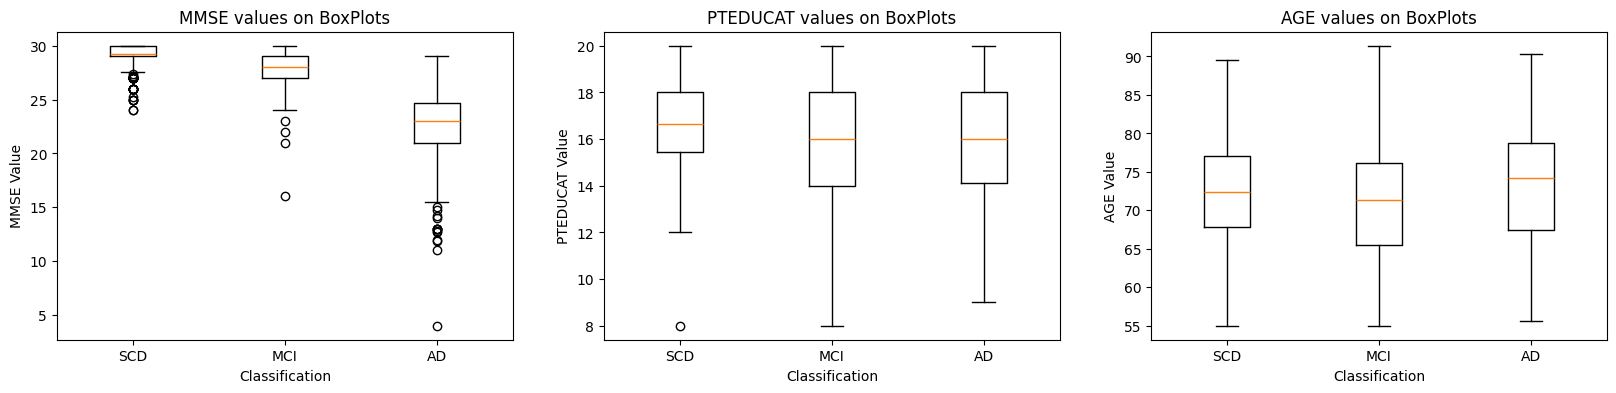

In [50]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)

In [51]:
preprocessor.write_to_csv(output_file_path + 'SMOTEData/data.csv')